<a href="https://colab.research.google.com/github/shengwenLeong/Colab/blob/main/GraphSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
#from queue import PriorityQueue

In [5]:
class ConstructKnnGraph:
  def __init__(self, vertex_number, k_value):
    self.G = nx.DiGraph()
    self.vertex_number = vertex_number
    self.k_value = k_value
  
  def KnnGraph(self):
    data = np.random.rand(self.vertex_number,2)
    for i in range(data.shape[0]):
      self.G.add_node(i, pos=(data[i][0], data[i][1]))
      self.G.add_node(i, prop=1)
      self.G.add_node(i, accum=0)
    for i in range(data.shape[0]):
      query = data[i]
      dist = {}
      for t in range(data.shape[0]):
        if t==i:
          continue
        dist[t] = np.linalg.norm(data[t] - query)
        #print("query={}, nn={}, distance={}".format(i,t,dist))
      vertexSort = sorted(dist.items(), key=lambda dist:dist[1], reverse=False)[:self.k_value]
      for vertex in vertexSort:
        self.G.add_edge(i, vertex[0])
        #print("edge=({},{})".format(i, vertex[0]))
  def DrawGraph(self):
    node_pos = nx.get_node_attributes(self.G, 'pos')
    nx.draw_networkx(self.G, node_pos)
    # Show the plot
    plt.show()

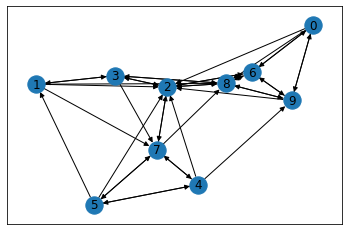

In [6]:
KGraph = ConstructKnnGraph(10, 4)
KGraph.KnnGraph()
KGraph.DrawGraph()

In [72]:
class PriorityQueueNode:
  def __init__(self, value, pr, pos):
    self.data = value
    self.priority = pr
    self.pos = 0
    self.next = None
         
# Implementation of Priority Queue
class PriorityQueue:
  def __init__(self):
    self.front = None
    self.queue_size = 0
         
  #Method to check Priority Queue is Empty
  #or not if Empty then it will return True
  #Otherwise False
  def isEmpty(self):
    return True if self.front == None else False 
  # Method to add items in Priority Queue
  # According to their priority value
  def push(self, value, priority):
    # Condition check for checking Priority
    # Queue is empty or not
    if self.isEmpty() == True:
      #print("init insert={},{}".format(value, priority))
      # Creating a new node and assigning
      # it to class variable
      self.front = PriorityQueueNode(value, priority, 0)
      self.queue_size = self.queue_size + 1
      # Returning 1 for successful execution
      return 1, 0
    else:
      # Special condition check to see that
      # first node priority value
      if self.front.priority > priority:
        #print("insert ={},{} > {},{}".format(self.front.data, self.front.priority, value, priority))
        # Creating a new node
        pos = 0
        newNode = PriorityQueueNode(value,priority,pos)
        # Updating the new node next value
        newNode.next = self.front
                 
        # Assigning it to self.front
        self.front = newNode
        temp = self.front
        while temp.next:
          pos = temp.pos
          temp = temp.next
          temp.pos = pos + 1
        pos = self.queue_size
        self.queue_size = self.queue_size + 1
                 
        # Returning 1 for successful execution
        return 1, pos
                 
      else:
        # Traversing through Queue until it
        # finds the next smaller priority node
        #print("insert={},{} < {},{}".format(self.front.data, self.front.priority, value, priority))
        temp = self.front
        while temp.next:
          # If same priority node found then current
          # node will come after previous node
          if priority <= temp.next.priority:
            break
          temp = temp.next
        pos = temp.pos + 1
        newNode = PriorityQueueNode(value,priority,pos)
        newNode.next = temp.next
        temp.next = newNode
        while temp.next:
          pos = temp.pos
          temp = temp.next
          temp.pos = pos + 1
        self.queue_size = self.queue_size + 1
        # Returning 1 for successful execution
        return 1, pos
  # Method to remove high priority item
  # from the Priority Queue
  def pop(self): 
    # Condition check for checking
    # Priority Queue is empty or not
    if self.isEmpty() == True:
      return 
    else:
      # Removing high priority node from
      # Priority Queue, and updating front
      # with next node
      self.front = self.front.next
      return 1
             
  # Method to return high priority node
  # value Not removing it
  def peek(self):
    # Condition check for checking Priority
    # Queue is empty or not
    if self.isEmpty() == True:
      return
    else:
      return self.front.data       
  # Method to Traverse through Priority
  # Queue
  def traverse(self):
    # Condition check for checking Priority
    # Queue is empty or not
    if self.isEmpty() == True:
      return "Queue is Empty!"
    else:
      temp = self.front
      while temp:
        print("({}, {})".format(temp.data, temp.pos))
        temp = temp.next

In [73]:
# Driver code
if __name__ == "__main__":
     
    # Creating an instance of Priority
    # Queue, and adding values
    # 7 -> 4 -> 5 -> 6
    pq = PriorityQueue()
    print(pq.push(4, 4))
    print(pq.push(5, 5))
    print(pq.push(6, 6))
    print(pq.push(7, 3))
    print(pq.push(8, 2))
    print(pq.push(9, 1))

     
    # Traversing through Priority Queue
    pq.traverse()
     
    # Removing highest Priority item
    # for priority queue
    print(pq.peek())
    print(pq.pop())
    print(pq.peek())

(1, 0)
(1, 0)
(1, 1)
(1, 3)
(1, 4)
(1, 5)
(9, 0)
(8, 1)
(7, 2)
(4, 3)
(5, 4)
(6, 5)
9
1
8


In [ ]:
import sys
MAX_PROP = sys.maxsize - 1
class GraphFramework:
  def __init__(self, inputGraph):
    self.G = inputGraph
    self.edges = self.G.edges()
    self.update = []
    self.vertex = self.G.nodes()
    self.BIT_MASK = 0x80000000
  
  def initProperty(self, srcProp):
    return srcProp + 1 #the level of bfs

  def reset_nodes_attribute(self):
    for i in self.vertex:
      self.G.add_node(i, accum=MAX_PROP)

  def Scatter(self, weight=None, srcProp=None):
    return srcProp

  def Gather(self, ori, dst_value):
    if ((((ori & ~self.BIT_MASK) > (dst_value & ~self.BIT_MASK)) and (dst_value != 0)) or (ori == 0x0)):
      return dst_value
    else:
      return ori
    #return ((((ori & ~self.BIT_MASK) > (dst_value & ~self.BIT_MASK)) && (dst_value != 0)) || (ori == 0x0)) ? (dst_value) : (ori)

  def Apply(self, accum, value):
    update = 0
    uProp = accum
    wProp = 0
    if (((value & self.BIT_MASK) == self.BIT_MASK) and (uProp == MAX_PROP)):
      print("enter this stage")
      iter = 1
      wProp = value
    else:
      iter = 0
      wProp = uProp & 0x7FFFFFFF
    update = wProp
    return iter, update


  def run(self):
    iter = 1
    count = 0
    while iter and count < 10:
      for src, dst in self.edges:
        print("edge=({},{})".format(src,dst))
        srcProp  = self.G.nodes[src]['prop']
        srcProp  = self.initProperty(srcProp)
        dst_value = self.Scatter(srcProp=srcProp)
        self.update.append((src, dst, dst_value))

      for src, dst, dst_value in self.update:
        print("update=({},{})".format(src, dst))
        ori = self.G.nodes[dst]['accum']
        print("input value=({},{})".format(ori, dst_value))
        accum = self.Gather(ori, dst_value)
        print("dst={}, accum=({})".format(dst, accum))
        self.G.add_node(dst, accum=accum)
      iter = 0
      for v in self.vertex:
        accum = self.G.nodes[v]['accum']
        value = self.G.nodes[v]['prop']
        print("vertex={}, apply_input=({},{})".format(v,accum,value))
        iter_, result = self.Apply(accum, value)
        print("vertex={},iter_={},apply={}".format(v,iter_,result))
        self.G.nodes[v]['prop'] = result
        iter = iter + iter_
      self.update.clear()
      print(list(self.G.nodes(data=True)))
      count = count + 1